In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import warnings
warnings.simplefilter("ignore")

In [3]:
COLORS = sns.color_palette()

In [4]:
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

In [24]:
from datetime import datetime

## 데이터 로드

In [5]:
retail = pd.read_csv('../../data/dataset/Online Retail Clean.csv')

In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [8]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


#### 우수고객

- 구매 횟수 기준
- 지불 금액 기준

In [16]:
# 고객 ID 기준 count
retail.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
17846       1
13017       1
13099       1
13106       1
12346       1
Name: InvoiceNo, Length: 4338, dtype: int64

In [17]:
# 고객 ID 기준 checkoutPrice sum
retail.groupby('CustomerID')['checkoutPrice'].sum().sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: checkoutPrice, Length: 4338, dtype: float64

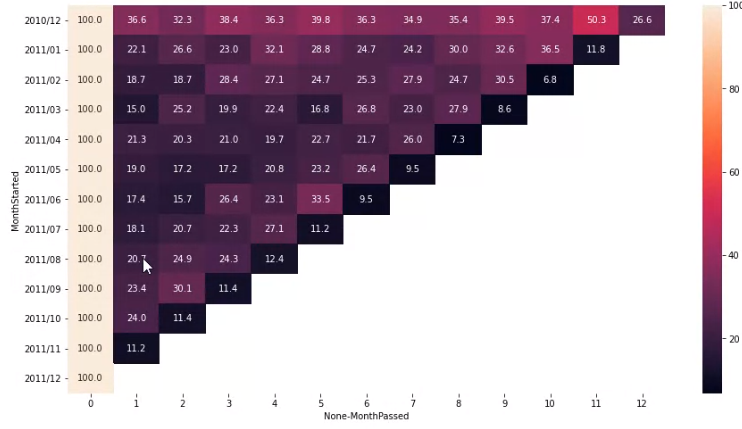

#### 사용자 기준으로 최초 구매한 월 구하기

In [25]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

In [26]:
retail['month'] = retail['InvoiceDate'].apply(get_month_as_datetime)

In [27]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01


In [30]:
retail.groupby('CustomerID')['month'].min()

CustomerID
12346   2011-01-01
12347   2010-12-01
12348   2010-12-01
12349   2011-11-01
12350   2011-02-01
           ...    
18280   2011-03-01
18281   2011-06-01
18282   2011-08-01
18283   2011-01-01
18287   2011-05-01
Name: month, Length: 4338, dtype: datetime64[ns]

In [32]:
# 최초 구매 월
retail['MonthStarted'] = retail.groupby('CustomerID')['month'].transform(min)

In [33]:
retail.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,month,MonthStarted
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


#### 기준이 되는 월과 실제 구매 월의 차이 계산
- 각 구개막 최초 구매로부터 얼마나 개월수가 지났는지 계산

In [38]:
retail['monthPassed'] = (retail['month'].dt.year - retail['MonthStarted'].dt.year) * 12 + (retail['month'].dt.month - retail['MonthStarted'].dt.month)

In [39]:
retail.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutPrice,month,MonthStarted,monthPassed
274536,569823,84879,ASSORTED COLOUR BIRD ORNAMENT,2,2011-10-06 12:15:00,1.69,16895,United Kingdom,3.38,2011-10-01,2011-10-01,0
262623,568712,22653,BUTTON BOX,1,2011-09-28 15:50:00,1.95,17841,United Kingdom,1.95,2011-09-01,2010-12-01,9
287480,571104,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-10-13 15:58:00,0.55,18130,United Kingdom,13.20,2011-10-01,2011-10-01,0
366634,578364,23695,DOILY THANK YOU CARD,12,2011-11-24 10:42:00,0.42,13588,United Kingdom,5.04,2011-11-01,2011-03-01,8
276138,569904,22551,PLASTERS IN TIN SPACEBOY,12,2011-10-06 16:27:00,1.65,13023,United Kingdom,19.80,2011-10-01,2011-08-01,2
163438,557330,22045,SPACEBOY GIFT WRAP,25,2011-06-20 10:20:00,0.42,14291,United Kingdom,10.50,2011-06-01,2011-03-01,3
242776,566747,85175,CACTI T-LIGHT CANDLES,16,2011-09-14 15:33:00,0.42,16928,United Kingdom,6.72,2011-09-01,2010-12-01,9
228062,565245,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-09-02 10:24:00,0.42,16678,United Kingdom,5.04,2011-09-01,2011-03-01,6
163331,557326,21066,VINTAGE RED MUG,12,2011-06-20 09:50:00,1.25,14194,United Kingdom,15.00,2011-06-01,2011-02-01,4
61871,544657,21745,GAOLERS KEYS DECORATIVE GARDEN,4,2011-02-22 13:08:00,3.75,14895,United Kingdom,15.00,2011-02-01,2011-02-01,0


#### MonthStarted, monthPassed 기준으로 고객 카운팅

In [41]:
def get_unique_id(x):
    return len(np.unique(x))

In [45]:
cohort_df = retail.groupby(['MonthStarted', 'monthPassed'])['CustomerID'].apply(get_unique_id).reset_index()
cohort_df

,MonthStarted,monthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [47]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='monthPassed')
cohort_dfc

CustomerID                                                   \
monthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
monthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [49]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)
customer_cohort

CustomerID                                                   \
monthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
monthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

<AxesSubplot:xlabel='None-monthPassed', ylabel='MonthStarted'>

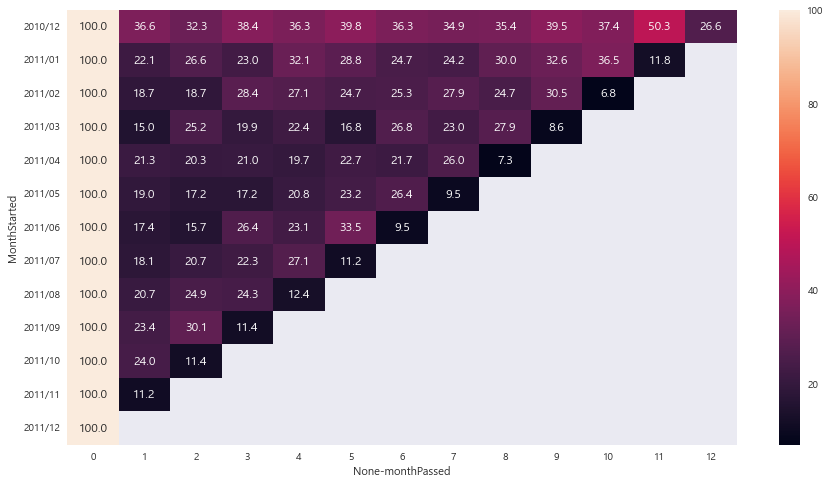

In [52]:
xticks = np.arange(0, 13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize=(15, 8))
sns.heatmap(customer_cohort, annot=True, fmt='.1f', xticklabels=xticks, yticklabels=yticks)